In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('data.txt')

In [4]:
df.head()

,Size,Price
0,2104,399900
1,1600,329900
2,2400,369000
3,1416,232000
4,3000,539900


In [5]:
df.describe()

,Size,Price
count,47.000000,47.000000
mean,2000.680851,340412.659574
std,794.702354,125039.899586
min,852.000000,169900.000000
25%,1432.000000,249900.000000
50%,1888.000000,299900.000000
75%,2269.000000,384450.000000
max,4478.000000,699900.000000


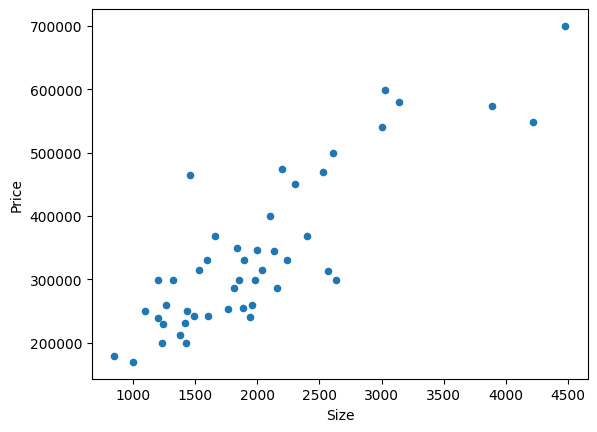

In [6]:
df.plot(x='Size',y='Price',kind='scatter');

## Normalizing


In [7]:
mean_size = df['Size'].mean()
std_size = df['Size'].std()
mean_price = df['Price'].mean()
std_price = df['Price'].std()

In [8]:
df['Size'] = (df['Size'] - mean_size) / std_size
df['Price'] = (df['Price'] - mean_price) / std_price

In [9]:
x = df['Size'] #features
y = df['Price'] #target value

In [10]:
m = x.shape[0] #number of data

### We know
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \$$

## Cost function
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\$$ 

In [11]:
'''Funtion to calculate the compute cost w/o vectorization'''

def compute_cost(x,y,w,b):
    cost = 0 

    for i in range(m):
        cost_func = w * x[i] + b
        cost = cost + (cost_func - y[i])**2
    total_cost = 1/(2*m)*cost

    return total_cost

In [14]:
'''Using vectorization'''
def compute_cost_vect(x,y,theta):
    func = theta[0]*x+theta[1]
    total_cost = 1/(2*m)*(sum((func-y)**2))
    return total_cost

*Gradient descent* is described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \ \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  

## Derivative for gradient descent
$$
\begin{align*}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \newline 
\frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \newline 
\end{align*}
$$


In [12]:
'''Function to calculate the derivatives (gradient) w/o vectorization'''
def gradient(x,y,w,b):
    m = x.shape[0]
    dj_dw = 0 
    dj_db = 0

    for i in range(m):
        func = w * x[i] + b
        dj_dw_i = (func - y[i])*x[i]
        dj_db_i = (func - y[i])

        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw,dj_db


In [13]:
'''Using vectorization for gradient'''
def gradient_vect(x,y,theta):
    deriv = np.zeros(2)
    deriv[0] = sum(((theta[0]*x+theta[1])-y)*x)/m
    deriv[1] = sum((theta[0]*x+theta[1])-y)/m
    
    return deriv

In [15]:
'''Function to calculate the gradient descent'''
def gradient_descent(x,y,theta,alpha,iters,compute_cost_vect,gradient_vect):
    m = x.shape[0]
    J_history = np.zeros((iters,1))

    for iter in range(iters):
        J = compute_cost_vect(x,y,theta)
        
        J_history[iter] = J

        deriv = gradient_vect(x,y,theta)

        theta[0] = theta[0] - alpha * deriv[0]

        theta[1] = theta[1] - alpha * deriv[1]

    return theta[0],theta[1],J_history


In [30]:
theta=[0,0]
alpha = 0.02
iterations = 150


w_fin, b_fin, j_hist = gradient_descent(x,y,theta,alpha,iterations,compute_cost_vect,gradient_vect)


In [31]:
w_fin,b_fin


(0.8109167167419286, -1.0100667347440791e-16)

In [34]:
df['predict']= np.dot(np.array(df['Size']),w_fin)+b_fin
df['predict'].head()

0    0.105427
1   -0.408856
2    0.407466
3   -0.596610
4    1.019708
Name: predict, dtype: float64

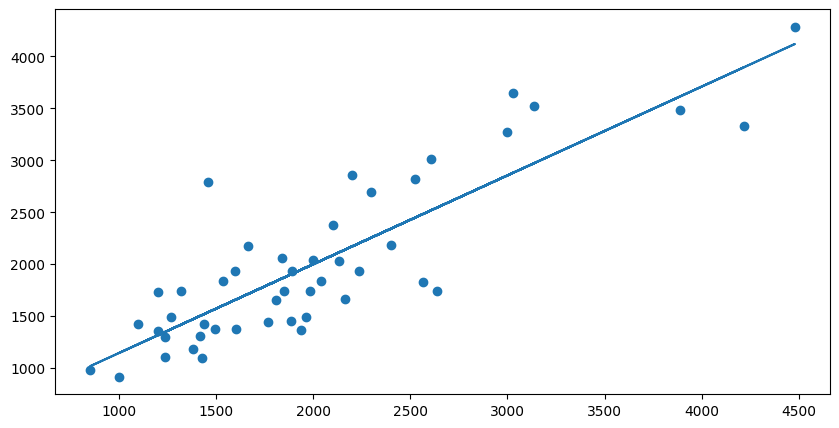

In [33]:
plt.figure(figsize=(10,5))
plt.scatter(df["Size"]*std_size+mean_size, df["Price"]*std_size+mean_size);
plt.plot(df["Size"]*std_size+mean_size,df['predict']*std_size+mean_size);